In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
import os
import pathlib
package_path = os.path.join(pathlib.Path.home(), "mkvchain")
sys.path.append(package_path)
from model import FeatureDependentMarkovChain



[[0.26315817 0.26315817 0.47368365]
 [0.2142862  0.42856698 0.35714683]
 [0.21052609 0.05263121 0.73684271]]
[[0.31347266 0.24261601 0.44391133]
 [0.24191664 0.44287466 0.3152087 ]
 [0.21815988 0.07232961 0.70951052]]
[[0.4293069  0.18568604 0.38500706]
 [0.2467875  0.29833636 0.45487613]
 [0.16333163 0.14953091 0.68713746]]
[[0.2777727  0.4444546  0.2777727 ]
 [0.36363743 0.09091343 0.54544914]
 [0.19355024 0.58064117 0.22580859]]
[[0.26286135 0.34740501 0.38973364]
 [0.35681227 0.08984297 0.55334476]
 [0.18589915 0.56454133 0.24955952]]
[[0.30874375 0.31028614 0.38097011]
 [0.38029611 0.08458723 0.53511666]
 [0.17232239 0.44244138 0.38523623]]
[[0.47058768 0.08823505 0.44117727]
 [0.57895123 0.15789324 0.26315553]
 [0.27777699 0.44444602 0.27777699]]
[[0.5637098  0.09539879 0.34089141]
 [0.4794199  0.22516169 0.29541841]
 [0.26446733 0.47573726 0.25979541]]
[[0.4612996  0.27852497 0.26017543]
 [0.41750451 0.28479259 0.2977029 ]
 [0.30476997 0.45001572 0.24521432]]
[[0.45833071 0.2083

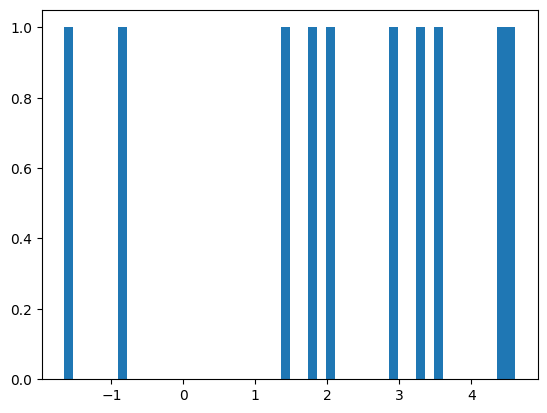

In [ ]:
x = []
for _ in range(10):
    T = 200
    n = 3
    P = np.random.rand(n, n) + .1
    P /= P.sum(axis=1)[:,None]

    # Creating 200-element state vector
    s = 0
    states = [s]
    for t in range(T-1):
        s = np.random.choice(np.arange(n), p=P[s, :])
        states.append(s)

    # Adding "missing" data
    i = 5
    while i < T-3:
        states[i] = np.nan
        i += 3

    s = 0
    states_test = [s]
    for t in range(T-1):
        s = np.random.choice(np.arange(n), p=P[s, :])
        states_test.append(s)

    model1 = FeatureDependentMarkovChain(n, n_iter=1) # 3 states
    model1.fit(states, np.zeros((T, 1)), [T], verbose=False) # states, features, lengths
    Phat1 = model1.predict(np.zeros((1, 1)))[0]
    model2 = FeatureDependentMarkovChain(n, n_iter=20)
    model2.fit(states, np.zeros((T, 1)), [T], verbose=False)
    Phat2 = model2.predict(np.zeros((1, 1)))[0]
    x.append(model2.score(states_test, np.zeros((T, 1)), [T]) - model1.score(states_test, np.zeros((T, 1)), [T]))

    print(Phat1)
    print(Phat2)
    print(P)
print(np.min(x), np.max(x), np.mean(x), np.median(x))
plt.hist(x, bins=50)
plt.show()

In [14]:
np.zeros((T, 1)).shape

(200, 1)

In [15]:
[T]

[200]